# STIRAP

The "Stimulated Raman Adiabatic Passage" (STIRAP) is a well-known strategy to *adiabatically* (= slowly) transfer the population/probability from state $|0\rangle$ to state $|1\rangle$ of a three-level lambda system $|0\rangle \leftrightarrow |e\rangle \leftrightarrow |1\rangle$. Since it is an adiabatic process, let us refresh our mind about adiabatic driven dynamics by solving the Landau-Zener problem.

Consider first a **two-level driven system** (in the rotating frame) described by the Hamiltonian:

$$
\hat{H} = \Delta \hat{\sigma}_z + (\Omega/2)(\hat{\sigma}_+ + \hat{\sigma}_-),
$$

where $\Delta = \alpha t$, for $-\tau < t < \tau$.

1. Plot the spectrum as a function of time and consider the ground state at $t=-\tau$. Numerically compute the probability to end in the excited state at $t=\tau$ for different values of the parameters $(\Omega, \alpha, \tau)$. Compare this result with the analytical prediction (Landau-Zener):

   $$
   P_e \approx 1 - \exp(-\pi \Omega^2 / (2\alpha)),
   $$

   valid for sufficiently large $\tau$. The transfer is successful if the process is adiabatic, namely small $\alpha$.
   

Now and back to the STIRAP. The protocol uses two lasers, and runs as follows: Turn ON laser B (the one that couples $|e\rangle$ with $|1\rangle$, and resonant with it). Then slowly turn ON laser A (the one that couples $|0\rangle$ with $|e\rangle$, and resonant with it). Then slowly turn OFF laser B. Then turn OFF laser A.

Ok, that’s somehow counterintuitive, right? And yet it works! Let us make some considerations.

2. At every intermediate stage of this protocol, write down what are the instantaneous eigenstates of the Hamiltonian (for the atom). Of those three, identify which one is the ‘dark state’, i.e., the state that is not optically shifted due to the lasers. Show that the dark state goes indeed from $|0\rangle$ to $|1\rangle$. Track down the energy gaps from this level to the other two.

3. Now apply the adiabatic theorem from above to this problem. Observe that, when the adiabatic condition holds, the population is (almost) fully transferred from $|0\rangle$ to $|1\rangle$.

4. Estimate the imperfection of the transfer by numerical integration and decide if you can apply Landau-Zener theory to approximately predict the result. Think if this depends on the pulses shape.


### Utility 

adiabatic theorem: https://appquantmech.quantumtinkerer.tudelft.nl/adiabatic_theorem/

adiabatic quantum quantum: https://arxiv.org/pdf/1410.3562

https://physics.stackexchange.com/questions/584308/how-to-understand-the-quantum-adiabatic-theorem-intuitively

Landau-Zaner evolution:    https://www.tau.ac.il/~nitzan/320.pdf

In [1]:
import numpy as np
from numpy.linalg import eigvals
import matplotlib as plt
from matplotlib import pyplot as pl

### Point 1

In [2]:
# parameters
alpha = 0.1
Omega = 1 
Tau = 10.
n_steps = 2000 # time steps 


# constants 
sig_z = np.array([[1, 0],[0, -1]])
sig_plus = np.array([[0, 0], [1, 0]])
sig_min = np.array([[0, 1], [0, 0]])
print("SIGMA Z: ", sig_z)

SIGMA Z:  [[ 1  0]
 [ 0 -1]]


In [3]:
# definition of the hamiltonian 
def Hamiltonian(alpha=0.01, Omega=0.1,Tau=10, time=0):
    return (alpha*time)*sig_z + (Omega*0.5)*(sig_plus + sig_min)


In [4]:
# time grid 
time_list = np.linspace(-Tau, Tau, n_steps)
print("Dimensions time_list: ", time_list.shape)

Dimensions time_list:  (2000,)


In [5]:
# spectrum vs time 

eigval_list = np.array([eigvals(Hamiltonian(alpha=0.01, Omega=0.1,Tau=10, time=time)) for time in time_list])

print("Shape of the list of eigenvalues: ", eigval_list.shape)


Shape of the list of eigenvalues:  (2000, 2)


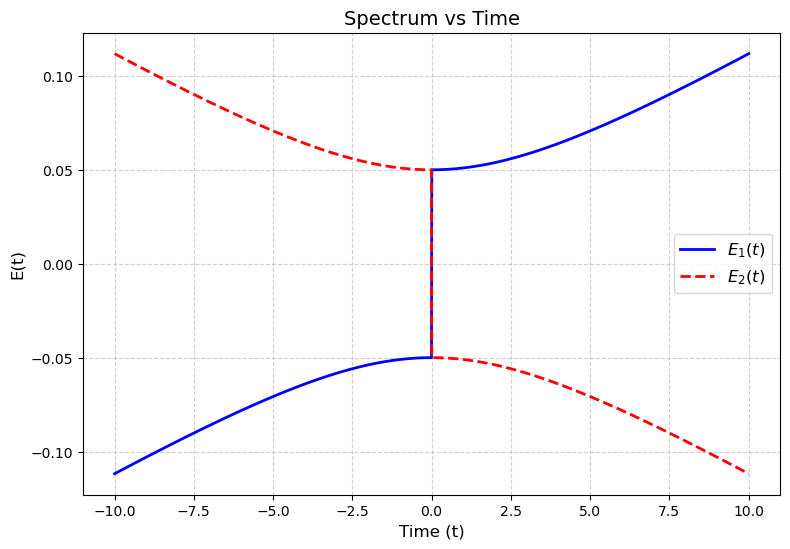

In [6]:
# plot

plt.rcParams['figure.figsize'] = [9,6]
pl.figure()
# Plot first function with label
pl.plot(time_list, eigval_list[:,0], color='blue', linestyle='-', linewidth=2, label=r'$E_1(t)$')

# Plot second function with a different label
pl.plot(time_list, eigval_list[:,1], color='red', linestyle='--', linewidth=2, label=r'$E_2(t)$')

# Labels and title

pl.xlabel('Time (t)', fontsize=12)  # X-axis label
pl.ylabel('E(t)', fontsize=12)  # Y-axis label
pl.title('Spectrum vs Time', fontsize=14)  # Title

# **Adding a grid and a legend**
pl.grid(True, linestyle='--', alpha=0.6)  # Add a grid with transparency
pl.legend(fontsize=12)  # Add legend
pl.show()



In [7]:
# Probability of being in the exited stated 

# theoretical expectation for tau >> 1 

Pe_theoretical = 1 - np.exp(-(np.pi*Omega**2)/(2*alpha))
print("Landau-Zanner probability of being in the exited state after tau >> 1: ", Pe_theoretical) 


Landau-Zanner probability of being in the exited state after tau >> 1:  0.9999998492982725


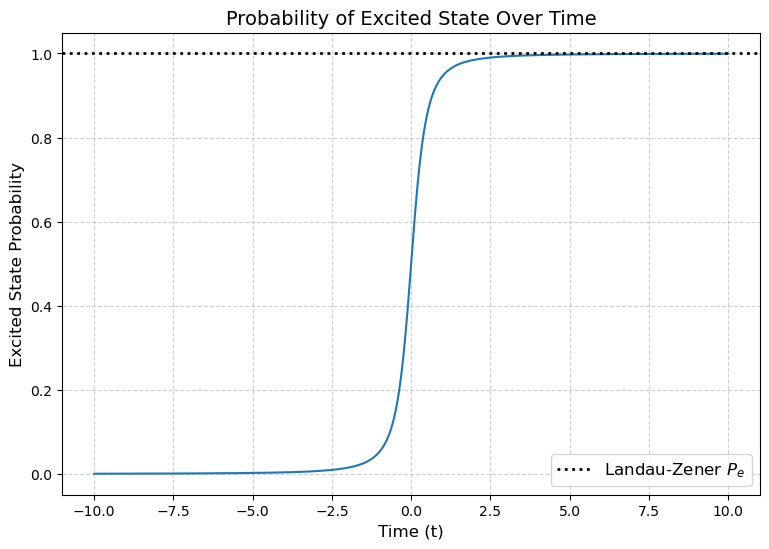

In [8]:
# numerical computation of Pe 

def Prob_e_t(vector):
    return (np.vdot(vector, np.array([0, 1])))**2


prob_e_list = np.zeros_like(time_list)

for i,t in enumerate(time_list):
    egenval,eigenvect = np.linalg.eigh(Hamiltonian(alpha=0.1, Omega=0.1,Tau=10, time=t))
    prob_e_list[i] = Prob_e_t(eigenvect[0,:])

######### plot #########
plt.rcParams['figure.figsize'] = [9,6]
pl.figure()
pl.plot(time_list, prob_e_list)
pl.axhline(y=(1 - np.exp(-(np.pi*Omega**2)/(2*alpha))), color='black', linestyle=':', linewidth=2, label='Landau-Zener $P_{e}$')

# **Adding labels and title**
pl.xlabel('Time (t)', fontsize=12)  # X-axis label
pl.ylabel('Excited State Probability', fontsize=12)  # Y-axis label
pl.title('Probability of Excited State Over Time', fontsize=14)  # Title

# **Adding a grid and a legend**
pl.grid(True, linestyle='--', alpha=0.6)  # Add a grid with transparency
pl.legend(fontsize=12)  # Add legend
pl.show()


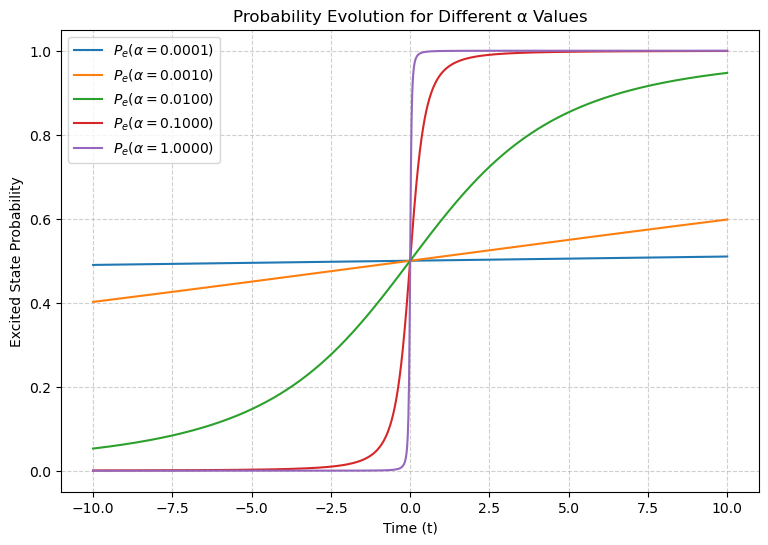

In [9]:
#### For different value of Alpha, Omega, Tau ####

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1]
tau_list = [1, 1, 1, 1, 1]
omega_list = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = [9,6]
pl.figure()

for j,a in enumerate(alpha_list):
    for i,t in enumerate(time_list):
        eigenval,eigenvect = np.linalg.eigh(Hamiltonian(alpha=a, Omega=0.1,Tau=10, time=t))
        prob_e_list[i] = Prob_e_t(eigenvect[0,:])

    pl.plot(time_list, prob_e_list, label=fr"$P_e(\alpha={a:.4f})$")
    
    
# Add legend and labels
pl.xlabel("Time (t)")
pl.ylabel("Excited State Probability")
pl.title("Probability Evolution for Different α Values")
pl.legend(fontsize=10)
pl.grid(True, linestyle="--", alpha=0.6)
pl.show()


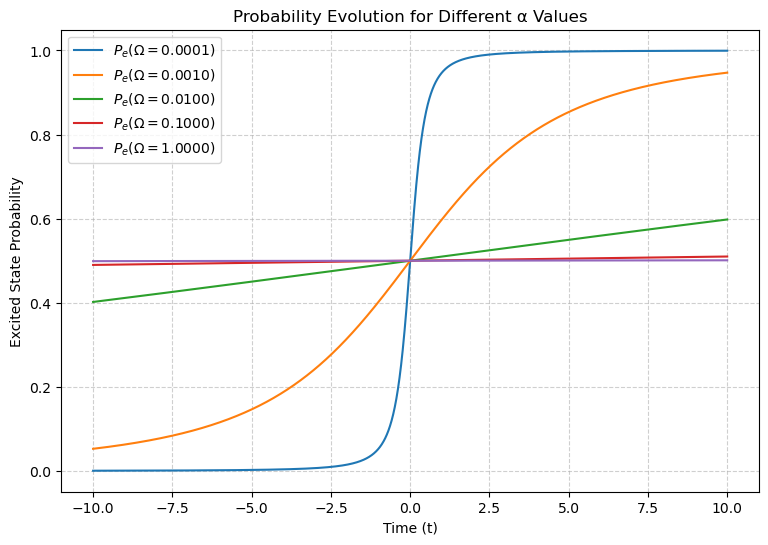

In [10]:
#### For different value of Omega ####

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1]
tau_list = [1, 1, 1, 1, 1]
omega_list = [0.0001, 0.001, 0.01, 0.1, 1]

plt.rcParams['figure.figsize'] = [9,6]
pl.figure()

for j,omega in enumerate(omega_list):
    for i,t in enumerate(time_list):
        eigenval,eigenvect = np.linalg.eigh(Hamiltonian(alpha=0.0001, Omega=omega,Tau=10, time=t))
        prob_e_list[i] = Prob_e_t(eigenvect[0,:])

    pl.plot(time_list, prob_e_list, label=fr"$P_e(\Omega={omega:.4f})$")
    
    
# Add legend and labels
pl.xlabel("Time (t)")
pl.ylabel("Excited State Probability")
pl.title("Probability Evolution for Different α Values")
pl.legend(fontsize=10)
pl.grid(True, linestyle="--", alpha=0.6)
pl.show()

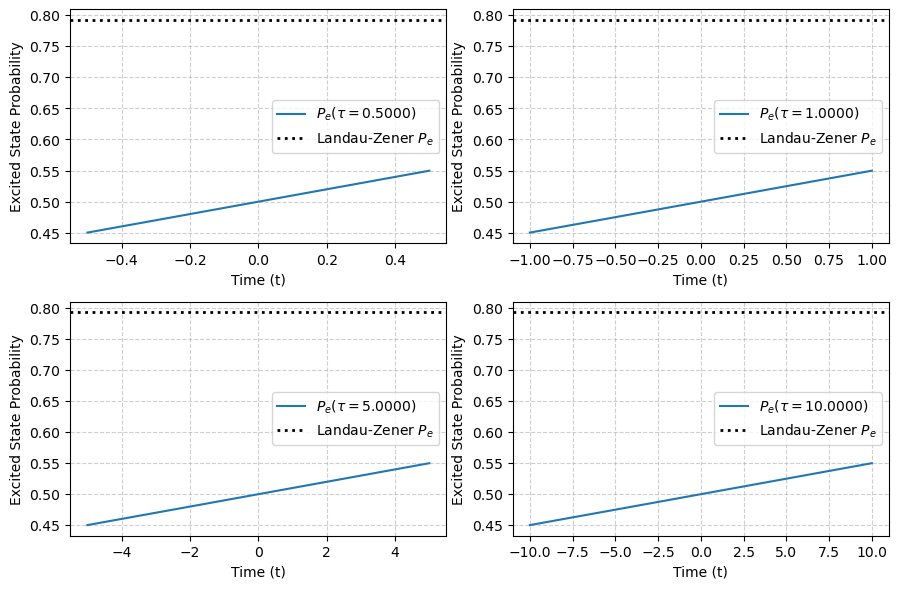

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
alpha = 0.01
Omega = 0.1
tau_list = [0.5, 1, 5, 10]  # List of tau values
n_steps = 2000  # Number of steps for time list

# Example Hamiltonian function
def Hamiltonian(alpha, Omega, Tau, time):
    return np.array([[alpha * time / Tau, Omega], [Omega, -alpha * time / Tau]])

# Probability calculation function
def Prob_e_t(vector):
    return (np.vdot(vector, np.array([0, 1])))**2


# Create subplots (2 rows, 2 columns)
figure, axis = plt.subplots(2, 2, figsize=(9, 6))

# Loop over tau_list and plot each on a separate subplot
for j, tau in enumerate(tau_list):
    time_list = np.linspace(-tau, tau, n_steps)
    prob_e_list = np.zeros_like(time_list)  # Initialize prob_e_list for each tau
    
    # Calculate probabilities
    for i, t in enumerate(time_list):
        eigenval, eigenvect = np.linalg.eigh(Hamiltonian(alpha=alpha, Omega=Omega, Tau=tau, time=t))
        prob_e_list[i] = Prob_e_t(eigenvect[:, 0])  # Assuming excited state is the second eigenvector
    
    # Select subplot based on the index
    ax = axis[j // 2, j % 2]  # Select the correct subplot in 2x2 grid

    # Plot on the current axis
    ax.plot(time_list, prob_e_list, label=fr"$P_e(\tau={tau:.4f})$")
    #ax.axhline(y=(1 - np.exp(-(np.pi * Omega**2) / (2 * alpha))), color='black', linestyle=':', linewidth=2, label='Landau-Zener $P_{e}$')
    ax.axhline(y=(1 - np.exp(-(np.pi*Omega**2)/(2*alpha))), color='black', linestyle=':', linewidth=2, label='Landau-Zener $P_{e}$')

    # Add labels and title
    ax.set_xlabel("Time (t)")
    ax.set_ylabel("Excited State Probability")

    
    ax.grid(True, linestyle="--", alpha=0.6)
    ax.legend(fontsize=10)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

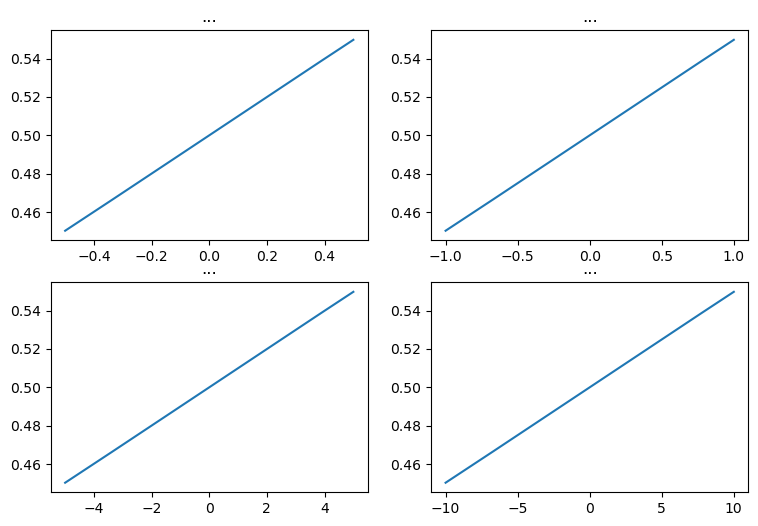

In [12]:
# importing libraries
import matplotlib.pyplot as plt
import numpy as np
import math

# Define parameters
alpha = 0.01
Omega = 0.1
tau_list = [0.5, 1, 5, 10]  # List of tau_list[] values
n_steps = 2000  # Number of steps for time list

# Initialise the subplot function using number of rows and columns
figure, axis = pl.subplots(2, 2)


time_list = np.linspace(-tau_list[0], tau_list[0], n_steps)
prob_e_list = np.zeros_like(time_list)  # Initialize prob_e_list for each tau_list[]
    
# Calculate probabilities
for i, t in enumerate(time_list):
    eigenval, eigenvect = np.linalg.eigh(Hamiltonian(alpha=alpha, Omega=Omega, Tau=tau_list[0], time=t))
    prob_e_list[i] = Prob_e_t(eigenvect[:, 0])
# For Sine Function
axis[0, 0].plot(time_list, prob_e_list)
axis[0, 0].set_title("...")


time_list = np.linspace(-tau_list[1], tau_list[1], n_steps)
prob_e_list = np.zeros_like(time_list)  # Initialize prob_e_list for each tau_list[]
    
# Calculate probabilities
for i, t in enumerate(time_list):
    eigenval, eigenvect = np.linalg.eigh(Hamiltonian(alpha=alpha, Omega=Omega, Tau=tau_list[1], time=t))
    prob_e_list[i] = Prob_e_t(eigenvect[:, 0])
# For Sine Function
axis[0, 1].plot(time_list, prob_e_list)
axis[0, 1].set_title("...")

time_list = np.linspace(-tau_list[2], tau_list[2], n_steps)
prob_e_list = np.zeros_like(time_list)  # Initialize prob_e_list for each tau_list[]
    
# Calculate probabilities
for i, t in enumerate(time_list):
    eigenval, eigenvect = np.linalg.eigh(Hamiltonian(alpha=alpha, Omega=Omega, Tau=tau_list[2], time=t))
    prob_e_list[i] = Prob_e_t(eigenvect[:, 0])
# For Sine Function
axis[1, 0].plot(time_list, prob_e_list)
axis[1, 0].set_title("...")


time_list = np.linspace(-tau_list[3], tau_list[3], n_steps)
prob_e_list = np.zeros_like(time_list)  # Initialize prob_e_list for each tau_list[]
    
# Calculate probabilities
for i, t in enumerate(time_list):
    eigenval, eigenvect = np.linalg.eigh(Hamiltonian(alpha=alpha, Omega=Omega, Tau=tau_list[3], time=t))
    prob_e_list[i] = Prob_e_t(eigenvect[:, 0])
# For Sine Function
axis[1, 1].plot(time_list, prob_e_list)
axis[1, 1].set_title("...")

# Combine all the operations and display
pl.show()

### Point 2: $\Lambda$ model

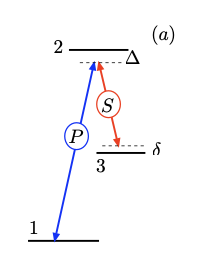

In [13]:
from IPython.display import display, Image

# Corrected file path
file_path = "images/lam-system.png"

# Display the image
display(Image(filename=file_path))

### Hamiltonian of the system

$$
H(t) = \hbar 
\begin{bmatrix}
0 & \frac{1}{2}\Omega_P(t) & 0 \\
\frac{1}{2}\Omega_P(t) & \Delta & \frac{1}{2}\Omega_S(t) \\
0 & \frac{1}{2}\Omega_S(t) & \delta
\end{bmatrix}.
$$

$$
\Omega_P(t) = -\frac{d_{12} \mathcal{E}_P(t)}{\hbar}, \quad 
\Omega_S(t) = -\frac{d_{23} \mathcal{E}_S(t)}{\hbar}.
$$

#### Single photon detuning
$$
\hbar \Delta_P = E_2 - E_1 - \hbar \omega_P, \quad 
\hbar \Delta_S = E_2 - E_3 - \hbar \omega_S.
$$

#### Double photon detuning
$\delta = \Delta_P - \Delta_S$  
In out case it will be zero.

The instant eigenstates of the of the effective Hamiltonian also known ad adiabatic state:
$$
\Phi_+ = 
\begin{bmatrix}
\sin\theta(t) \sin\varphi(t) \\
\cos\varphi(t) \\
\cos\theta(t) \sin\varphi(t)
\end{bmatrix}, \quad 
\varepsilon_+ = \frac{1}{2} \left[ \Delta + \sqrt{\Delta^2 + \Omega_{\text{rms}}^2(t)} \right],
$$

$$
\Phi_- = 
\begin{bmatrix}
\sin\theta(t) \cos\varphi(t) \\
-\sin\varphi(t) \\
\cos\theta(t) \cos\varphi(t)
\end{bmatrix}, \quad 
\varepsilon_- = \frac{1}{2} \left[ \Delta - \sqrt{\Delta^2 + \Omega_{\text{rms}}^2(t)} \right],
$$

#### Dark state (associated with \(\varepsilon_0\))

$$
\Phi_0 = 
\begin{bmatrix}
\cos\theta(t) \\
0 \\
-\sin\theta(t)
\end{bmatrix}, \quad 
\varepsilon_0 = 0,
$$

$$
\tan\theta(t) = \frac{\Omega_P(t)}{\Omega_S(t)}, \quad 
\tan\varphi(t) = \frac{\Omega_{\text{rms}}(t)}{\sqrt{\Omega_{\text{rms}}^2(t) + \Delta^2 + \Delta}}, \quad 
\Omega_{\text{rms}}(t) = \sqrt{\Omega_P^2(t) + \Omega_S^2(t)}.
$$



### Plots

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Gaussian pulse shapes
def gaussian(t, t0, width):
    return np.exp(-((t - t0) / width) ** 2)



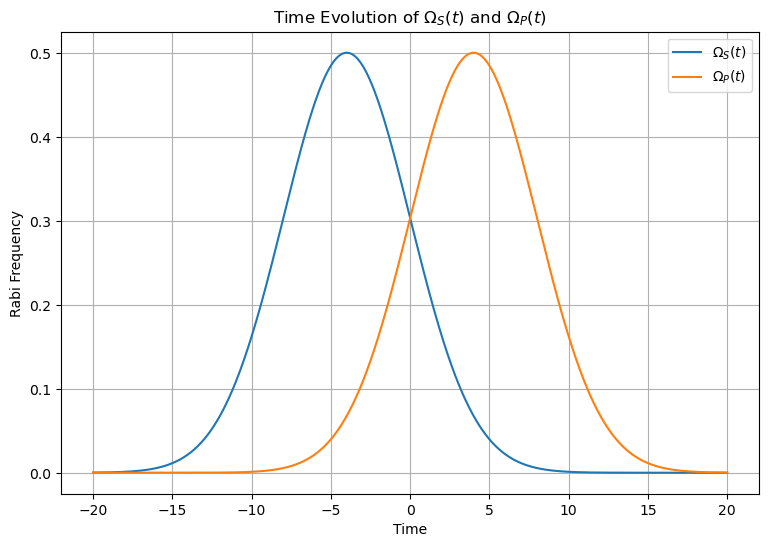

In [15]:

def gaussian(t, t0, width):
    return np.exp(-((t - t0) ** 2) / (2 * width ** 2))

Tau = 20.
n_steps = 2000  # Number of time steps
time_list = np.linspace(-Tau, Tau, n_steps)

time_P = 0.2 * Tau  # Start time for P
time_S = -0.2 * Tau  # Start time for S
Omega_o = 0.5  # Max value of the Rabi frequency

Omega_S = Omega_o*np.array([gaussian(t, time_S, 4) for t in time_list])
Omega_P = Omega_o* np.array([gaussian(t, time_P, 4) for t in time_list])

# Plotting
plt.plot(time_list, Omega_S, label=r'$\Omega_S(t)$')
plt.plot(time_list, Omega_P, label=r'$\Omega_P(t)$')

# Labels and legend
plt.xlabel("Time")
plt.ylabel("Rabi Frequency")
plt.title("Time Evolution of $\Omega_S(t)$ and $\Omega_P(t)$")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

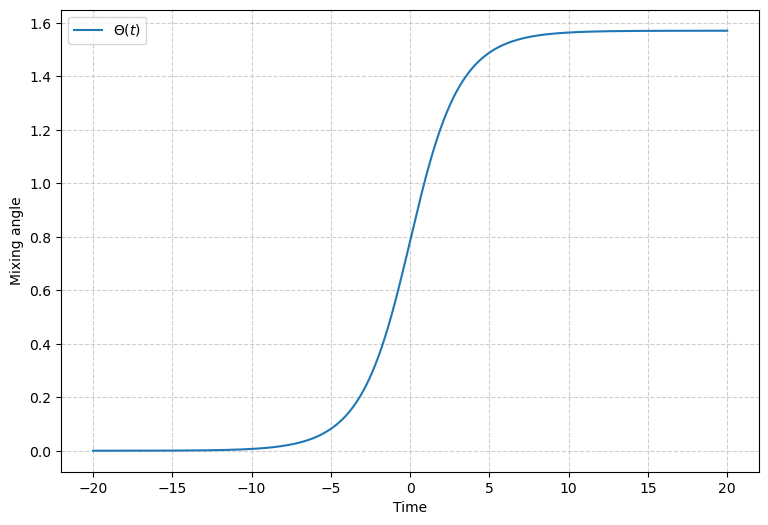

In [60]:
Delta = 0.01

Theta = np.arctan(Omega_P / Omega_S)

plt.plot(time_list, Theta, label = r"$\Theta(t)$")
plt.xlabel("Time")
plt.ylabel("Mixing angle")
plt.legend()
plt.grid(True, linestyle = "--", alpha = 0.6)


#### Dark state

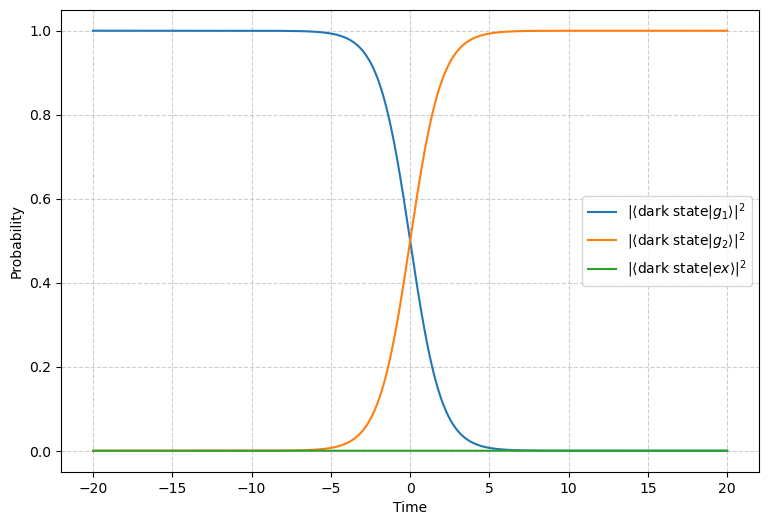

In [29]:
# We plot the dark state 

def Prob(v1,v2):
    return (np.vdot(v1, v2))**2
    


g1 = np.array([1,0,0])
g2 = np.array([0,1,0])
ex = np.array([0,0,1]) 

#dark_state = np.cos(Theta)*g1 - np.sin(Theta)*g2
dark_state = np.array([np.cos(angle)*g1 - np.sin(angle)*g2 for angle in Theta])
#print(np.shape(dark_state))

prob_dark_in_g1 = np.array(time_list)
for i,t in enumerate(time_list):
    prob_dark_in_g1[i] = Prob(dark_state[i,:],g1)

prob_dark_in_g2 = np.array(time_list)
for i,t in enumerate(time_list):
    prob_dark_in_g2[i] = Prob(dark_state[i,:],g2)

prob_dark_in_ex = np.array(time_list)
for i,t in enumerate(time_list):
    prob_dark_in_ex[i] = Prob(dark_state[i,:],ex)

plt.plot(time_list, prob_dark_in_g1, label=r"$|\langle \text{dark state} | g_1 \rangle|^2$")
plt.plot(time_list, prob_dark_in_g2, label=r"$|\langle \text{dark state} | g_2 \rangle|^2$")
plt.plot(time_list, prob_dark_in_ex, label=r"$|\langle \text{dark state} | ex \rangle|^2$")


plt.legend()
plt.xlabel("Time")
plt.ylabel("Probability")
plt.grid(True, linestyle = "--", alpha = 0.6)
plt.show()
#plt.plot(time_list,Theta)

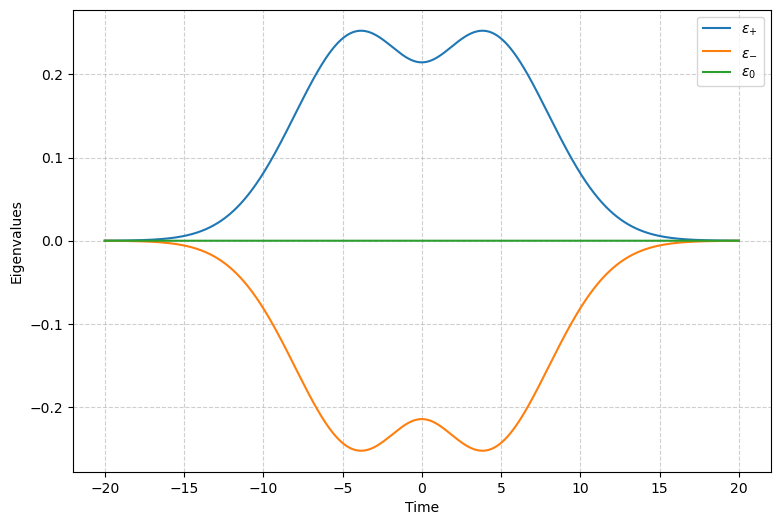

In [59]:
# we plot the energy gap between the 2 non dark states 

# I define Omega_rms
Delta = 0.
Omega_rms = np.sqrt(Omega_P**2 + Omega_S**2) 
delta_plus = 0.5*(Delta + np.sqrt(Delta**2 + Omega_rms**2))
delta_min = 0.5*(Delta - np.sqrt(Delta**2 + Omega_rms**2))
delta_0 = np.zeros_like(time_list)
#delta_E = np.sqrt(Delta**2 + Omega_rms**2)

plt.plot(time_list, delta_plus, label = r"$\epsilon_{+}$")
plt.plot(time_list, delta_min, label = r"$\epsilon_{-}$")
plt.plot(time_list, delta_0, label = r"$\epsilon_{0}$")

plt.xlabel("Time")
plt.ylabel("Eigenvalues")
plt.legend()
plt.grid(True, linestyle = "--", alpha = 0.6)
#plt.plot(time_list, delta_0)

